# **Imports**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [5]:
dados = pd.read_csv('hotel_bookings.csv',
                    sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

# **Base de dados**

In [3]:
dados.head() #Primeiras linhas

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **Descrição**

Hotel (H1 = Resort Hotel or H2 = City Hotel)

Value indicating if the booking was canceled (1) or not (0)

Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

Year of arrival date

Month of arrival date

Week number of year for arrival date

Day of arrival date

Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

Number of adults

Number of children

Number of babies

Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal

Country of origin. Categories are represented in the ISO 3155–3:2013 format

Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

Value indicating if the booking name was from a repeated guest (1) or not (0)

Number of previous bookings that were cancelled by the customer prior to the current booking

Number of previous bookings not cancelled by the customer prior to the current booking

Code of room type reserved. Code is presented instead of designation for anonymity reasons.

Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due

Number of changes/amendments made to the booking from the moment the booking was entered on the PMS

Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No

ID of the travel agency that made the booking

ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

Number of days the booking was in the waiting list before it was confirmed to the customer

Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

Number of car parking spaces required by the customer

Number of special requests made by the customer (e.g. twin bed or high floor)

Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel




In [406]:
dados.tail() #ultimas linhas

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
567,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
568,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
569,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
570,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1
571,1,93.0,70.0,31.0,NaN,30.4,0.315,23,0


In [407]:
dados.shape #Linhas e colunas do arquivo

(572, 9)

# **Plots**

Resort Hotel x City Hotel

In [35]:
h_city = 0
h_resort = 0

for i in range(len(dados['hotel'])):
    #print(i)
    if dados['hotel'][i] == 'Resort Hotel':
       h_resort += 1
    else:
        h_city += 1

h_resort = h_resort/len(dados['hotel'])
h_city = h_city/len(dados['hotel'])

print("Hotel Resort Média: %.2f%%" % (h_resort * 100.0))
print("Hotel City Média: %.2f%%" % (h_city * 100.0))

Hotel Resort Média: 33.55%
Hotel City Média: 66.45%


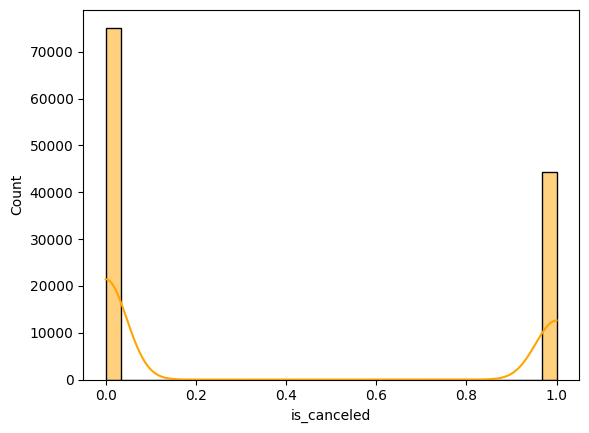

In [38]:
sns.histplot(dados, x='is_canceled', bins=30, color="orange", kde=True, stat="count");
#linha indica a distribuição média

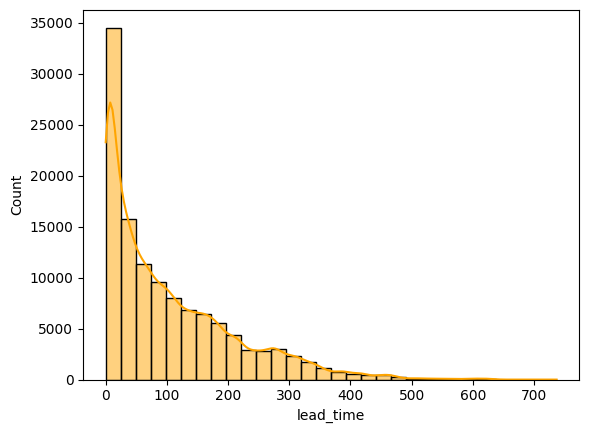

In [39]:
sns.histplot(dados, x='lead_time', bins=30, color="orange", kde=True, stat="count");


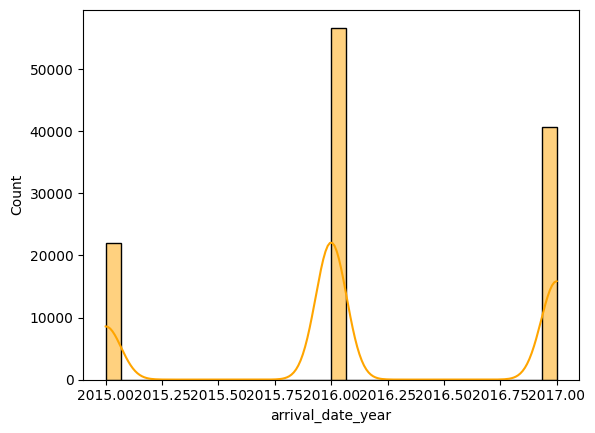

In [40]:
sns.histplot(dados, x='arrival_date_year', bins=30, color="orange", kde=True, stat="count");

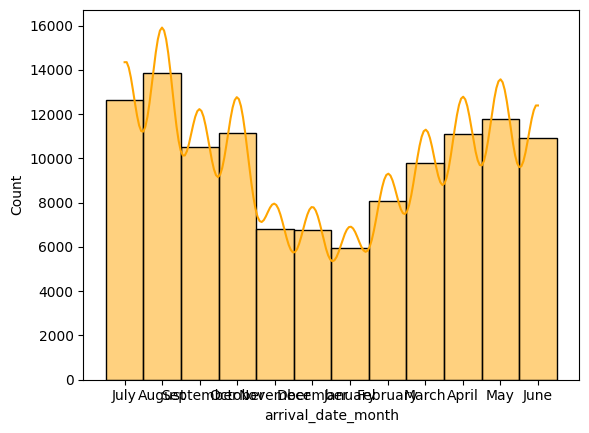

In [41]:
sns.histplot(dados, x='arrival_date_month', bins=30, color="orange", kde=True, stat="count");

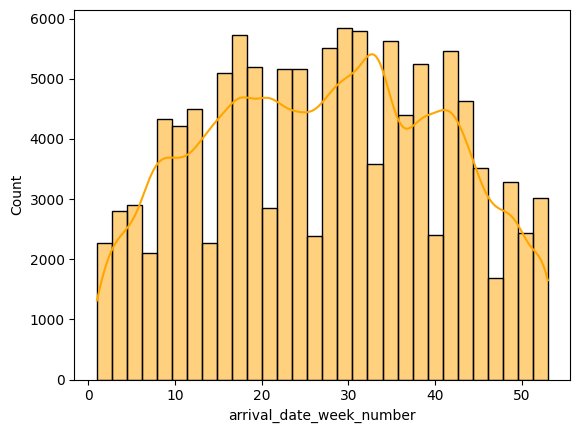

In [42]:
sns.histplot(dados, x='arrival_date_week_number', bins=30, color="orange", kde=True, stat="count");

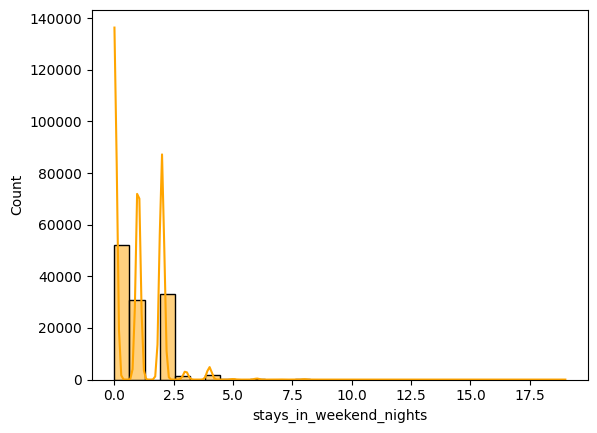

In [43]:
sns.histplot(dados, x='stays_in_weekend_nights', bins=30, color="orange", kde=True, stat="count");

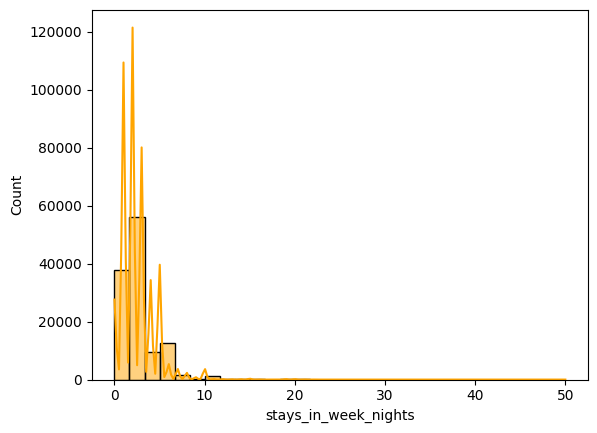

In [44]:
sns.histplot(dados, x='stays_in_week_nights', bins=30, color="orange", kde=True, stat="count");

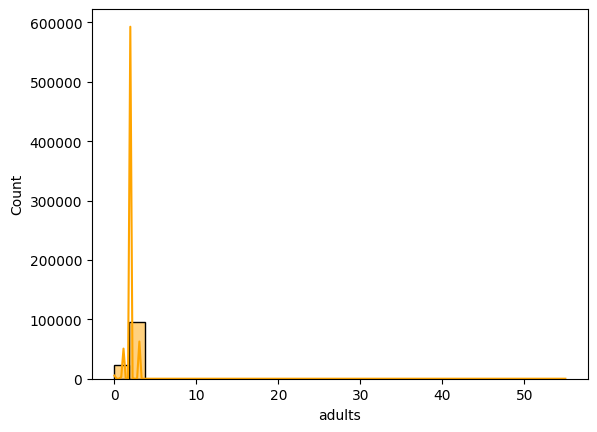

In [45]:
sns.histplot(dados, x='adults', bins=30, color="orange", kde=True, stat="count");

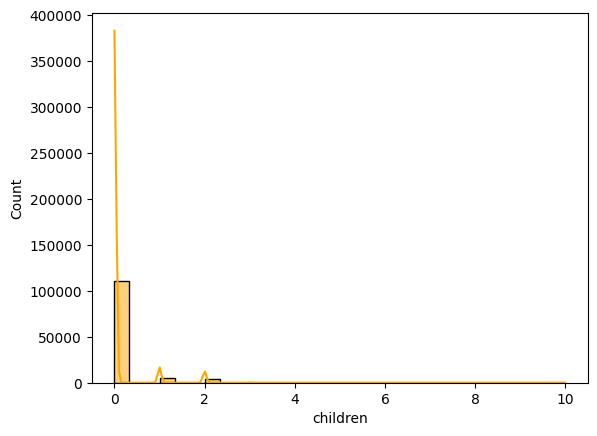

In [5]:
sns.histplot(dados, x='children', bins=30, color="orange", kde=True, stat="count");

Falta achar referência.

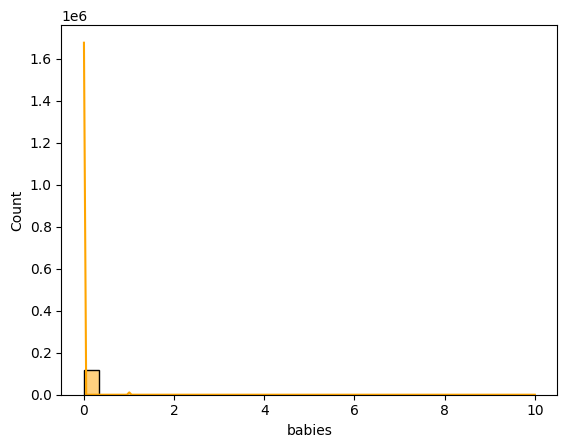

In [6]:
sns.histplot(dados, x='babies', bins=30, color="orange", kde=True, stat="count");

In [20]:
Bb = 0
Hb = 0
other = 0

for i in range(len(dados['meal'])):
    #print(i)
    if dados['meal'][i] == 'BB':
       Bb += 1
    if dados['meal'][i] == 'HB':
        Hb += 1

other = len(dados['meal']) - (Hb + Bb)
other = other/len(dados['meal'])
Bb = Bb/len(dados['meal'])
Hb = Hb/len(dados['meal'])

print("BB: %.2f%%" % (Bb * 100.0))
print("HB: %.2f%%" % (Hb * 100.0))
print("Other: %.2f%%" % (other * 100.0))

BB: 77.32%
HB: 12.11%
Other: 10.57%


In [23]:
Prt = 0
Gbr = 0
other = 0

for i in range(len(dados['country'])):
    #print(i)
    if dados['country'][i] == 'PRT':
       Prt += 1
    if dados['country'][i] == 'GBR':
        Gbr += 1

other = len(dados['country']) - (Prt + Gbr)
other = other/len(dados['country'])
Prt = Prt/len(dados['country'])
Gbr = Gbr/len(dados['country'])

print("PRT: %.2f%%" % (Prt * 100.0))
print("GBR: %.2f%%" % (Gbr * 100.0))
print("Other: %.2f%%" % (other * 100.0))

PRT: 40.70%
GBR: 10.16%
Other: 100.00%


In [425]:
dados.BMI.value_counts().sort_index()

18.2    2
18.4    1
19.1    1
19.3    1
19.4    1
       ..
50.0    1
52.3    2
52.9    1
55.0    1
57.3    1
Name: BMI, Length: 221, dtype: int64

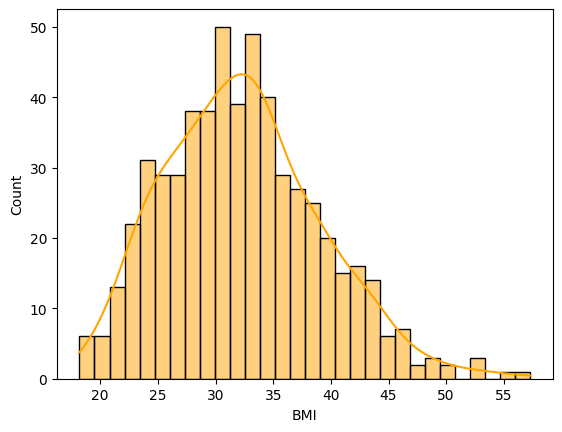

In [426]:
sns.histplot(dados, x='BMI', bins=30, color="orange", kde=True, stat="count"); 

In [427]:
dados.DiabetesPedigreeFunction.value_counts().sort_index()

0.078    1
0.084    1
0.085    2
0.088    2
0.092    1
        ..
1.781    1
1.893    1
2.137    1
2.288    1
2.329    1
Name: DiabetesPedigreeFunction, Length: 400, dtype: int64

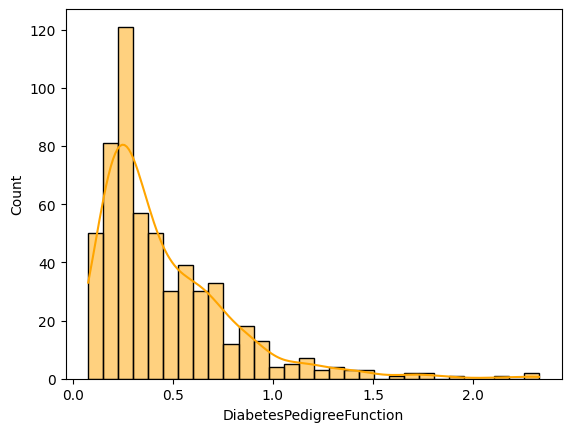

In [428]:
sns.histplot(dados, x='DiabetesPedigreeFunction', bins=30, color="orange", kde=True, stat="count");

Analise e tratamento

In [429]:
dados.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [430]:
#Dados faltosos
dados.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [431]:
#Pegando os doentes e os saudáveis

# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
#dados['column'].fillna(dados['column'].mean(), inplace=True)


# Separar entre saudáveis e diabéticos para adicionar o valores faltantes
saudaveis = dados[dados['Outcome']==0].copy()
doentes = dados[dados['Outcome']==1].copy()

# Preencher dados faltantes usando a mediana da classe
for column in saudaveis.columns[:-1]:
    saudaveis[column].fillna(saudaveis[column].median(), inplace=True)

for column in doentes.columns[:-1]:
    doentes[column].fillna(doentes[column].median(), inplace=True)

dados = pd.concat([saudaveis, doentes])

dados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,105.0,26.6,0.351,31,0
4,5,116.0,74.0,27.0,105.0,25.6,0.201,30,0
5,10,115.0,72.0,27.0,105.0,35.3,0.134,29,0
8,4,110.0,92.0,27.0,105.0,37.6,0.191,30,0
10,10,139.0,80.0,27.0,105.0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
560,8,154.0,78.0,32.0,175.0,32.4,0.443,45,1
562,0,123.0,72.0,32.0,175.0,36.3,0.258,52,1
564,6,190.0,92.0,32.0,175.0,35.5,0.278,66,1
566,9,170.0,74.0,31.0,175.0,44.0,0.403,43,1


In [432]:
dados.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [433]:
#Analise estatistica descritiva

dados.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,4.106643,121.627622,73.136364,29.190559,139.865385,32.298427,0.459121,34.043706,0.358392
std,3.446995,30.034239,11.965461,8.245174,76.111457,6.676774,0.336124,12.103893,0.479948
min,0.000000,44.000000,30.000000,7.000000,16.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,66.000000,27.000000,105.000000,27.500000,0.236000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.000000,105.000000,32.000000,0.344500,30.000000,0.000000
75%,6.000000,139.250000,80.000000,32.000000,175.000000,36.300000,0.605500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,57.300000,2.329000,81.000000,1.000000


In [434]:
dados.mode( axis = 0 )

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99.0,74.0,27.0,105.0,30.1,0.254,22.0,0.0
1,NaN,107.0,NaN,NaN,NaN,NaN,0.258,NaN,NaN


Analise de outliers

<AxesSubplot: xlabel='Age'>

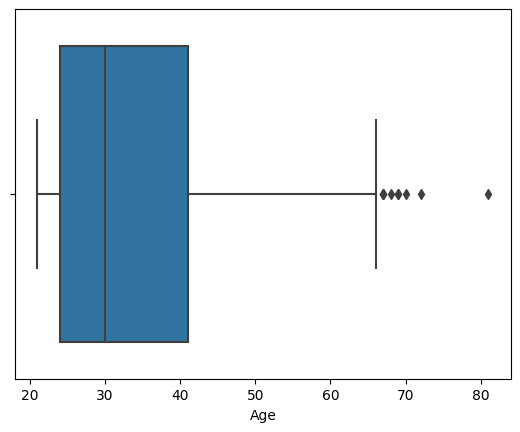

In [435]:
sns.boxplot(data=dados, x="Age")

<AxesSubplot: xlabel='Pregnancies'>

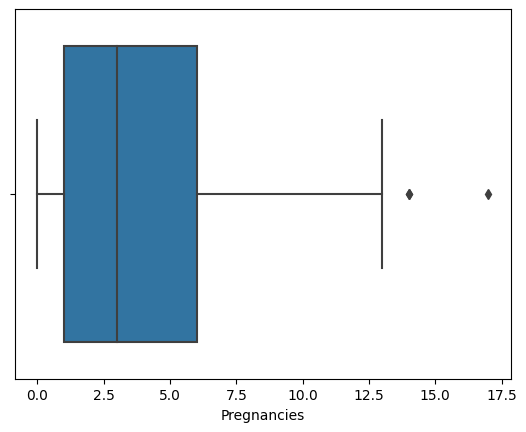

In [436]:
sns.boxplot(data=dados, x="Pregnancies")

<AxesSubplot: xlabel='Glucose'>

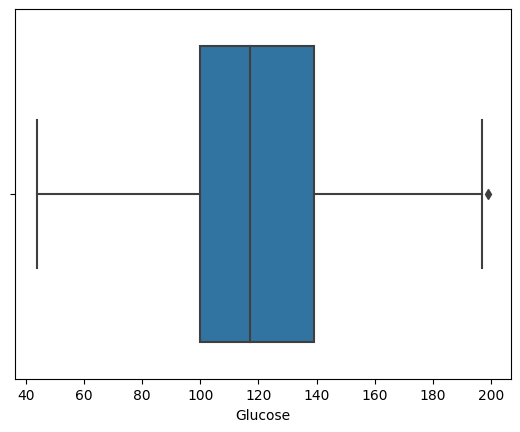

In [437]:
sns.boxplot(data=dados, x="Glucose")

<AxesSubplot: xlabel='BloodPressure'>

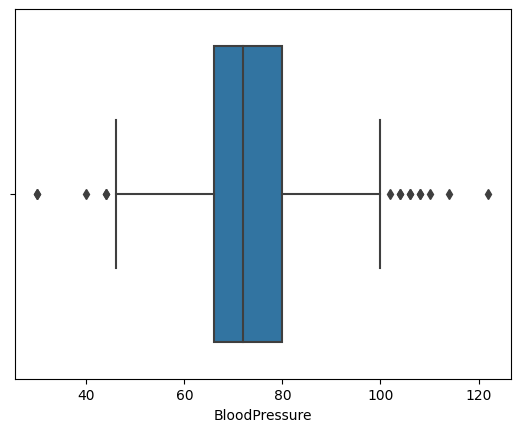

In [438]:
sns.boxplot(data=dados, x="BloodPressure")

<AxesSubplot: xlabel='SkinThickness'>

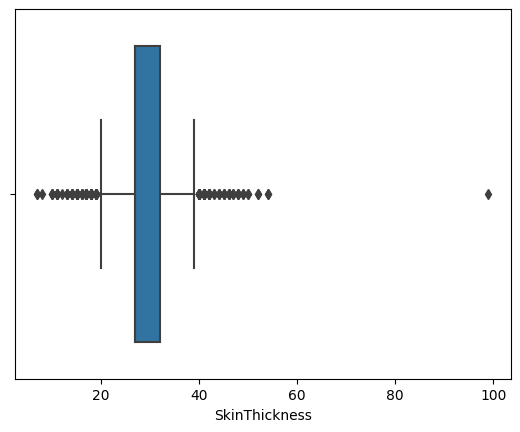

In [439]:
sns.boxplot(data=dados, x="SkinThickness")

<AxesSubplot: xlabel='Insulin'>

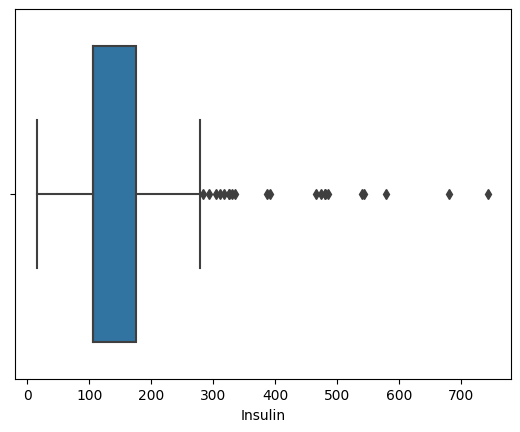

In [440]:
sns.boxplot(data=dados, x="Insulin")

<AxesSubplot: xlabel='BMI'>

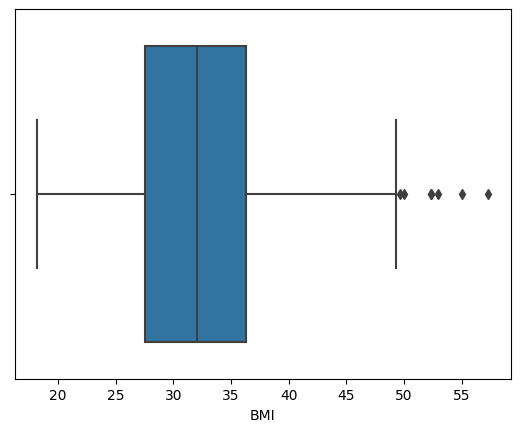

In [441]:
sns.boxplot(data=dados, x="BMI")

<AxesSubplot: xlabel='DiabetesPedigreeFunction'>

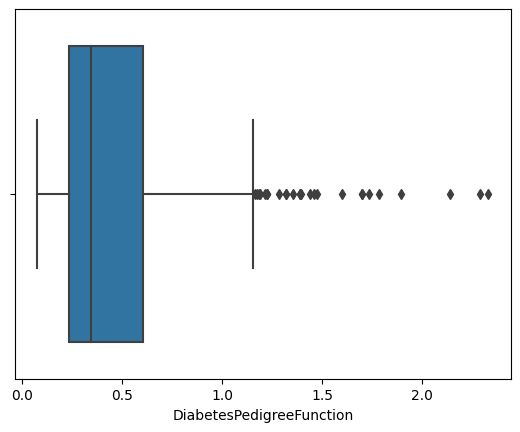

In [442]:
sns.boxplot(data=dados, x="DiabetesPedigreeFunction")

Atributos previsoes e alvos

In [443]:
dados.shape


(572, 9)

In [444]:
previsores = dados.iloc[:, 0:8].values #Pega os valores em formato de matriz

previsores.shape

(572, 8)

In [445]:
previsores

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [5.00e+00, 1.16e+02, 7.40e+01, ..., 2.56e+01, 2.01e-01, 3.00e+01],
       [1.00e+01, 1.15e+02, 7.20e+01, ..., 3.53e+01, 1.34e-01, 2.90e+01],
       ...,
       [6.00e+00, 1.90e+02, 9.20e+01, ..., 3.55e+01, 2.78e-01, 6.60e+01],
       [9.00e+00, 1.70e+02, 7.40e+01, ..., 4.40e+01, 4.03e-01, 4.30e+01],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.01e+01, 3.49e-01, 4.70e+01]])

In [446]:
alvo = dados.iloc[:, 8].values #pega os valores em formato de matriz

alvo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [447]:
alvo.shape

(572,)

Padronizando e Normalizando os atributos

Padronização (utiliza a média e o desvio padrão como referência).

Normalização (utiliza os valores máximo e mínimo como referência).

In [448]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [449]:
previsores_esc

array([[-0.9020501 , -1.22059634, -0.5969356 , ..., -0.85421703,
        -0.32195015, -0.25168518],
       [ 0.25939651, -0.18753757,  0.07224061, ..., -1.00412104,
        -0.76860425, -0.33437554],
       [ 1.71120477, -0.22086205, -0.09505344, ...,  0.44994791,
        -0.96810975, -0.4170659 ],
       ...,
       [ 0.54975816,  2.27847368,  1.57788711, ...,  0.47992871,
        -0.53932181,  2.64247753],
       [ 1.42084312,  1.61198415,  0.07224061, ...,  1.75411285,
        -0.16711006,  0.74059918],
       [-0.9020501 ,  0.14570719, -1.09881777, ..., -0.32955297,
        -0.32790554,  1.07136063]])

In [450]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7
0,-0.902050,-1.220596,-0.596936,-0.023132,-0.458484,-0.854217,-0.321950,-0.251685
1,0.259397,-0.187538,0.072241,-0.265910,-0.458484,-1.004121,-0.768604,-0.334376
2,1.711205,-0.220862,-0.095053,-0.265910,-0.458484,0.449948,-0.968110,-0.417066
3,-0.030965,-0.387484,1.577887,-0.265910,-0.458484,0.794727,-0.798381,-0.334376
4,1.711205,0.578925,0.574123,-0.265910,-0.458484,-0.779265,2.923736,1.898264
...,...,...,...,...,...,...,...,...
567,1.130481,1.078793,0.406829,0.341036,0.462025,0.015226,-0.048002,0.905980
568,-1.192412,0.045734,-0.095053,0.341036,0.462025,0.599852,-0.598876,1.484812
569,0.549758,2.278474,1.577887,0.341036,0.462025,0.479929,-0.539322,2.642478
570,1.420843,1.611984,0.072241,0.219647,0.462025,1.754113,-0.167110,0.740599


In [ ]:
previsoresdf.describe()

,0,1,2,3,4,5,6,7
count,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02
mean,-2.484415e-17,1.242208e-16,-3.167629e-16,7.453245e-17,2.484415e-17,8.447012e-16,1.739091e-16,3.726623e-17
std,1.000875e+00,1.000875e+00,1.000875e+00,1.000875e+00,1.000875e+00,1.000875e+00,1.000875e+00,1.000875e+00
min,-1.192412e+00,-2.586900e+00,-3.608229e+00,-2.693695e+00,-1.628845e+00,-2.113411e+00,-1.134861e+00,-1.078589e+00
25%,-9.020501e-01,-7.207292e-01,-5.969356e-01,-2.659103e-01,-4.584842e-01,-7.193034e-01,-6.643850e-01,-8.305177e-01
50%,-3.213268e-01,-1.542131e-01,-9.505344e-02,-2.659103e-01,-4.584842e-01,-4.473534e-02,-3.413052e-01,-3.343755e-01
75%,5.497582e-01,5.872565e-01,5.741228e-01,3.410358e-01,4.620246e-01,5.998519e-01,4.358730e-01,5.752185e-01
max,3.743736e+00,2.578394e+00,4.087298e+00,8.474114e+00,7.944447e+00,3.747836e+00,5.567929e+00,3.882833e+00


Salvando Variaveis

In [ ]:
import pickle

In [ ]:
#Criando arquivo
arq1 = open('dados_tratados.pkl', 'wb')

In [ ]:
# Salvando a variável no arquivo
pickle.dump(alvo, arq1)

In [ ]:
# Fechando arquivo
arq1.close()

In [ ]:
# Lendo arquivo
arq1 = open('dados_tratados.pkl', 'rb')

In [ ]:
# Chamando a variável
alvo = pickle.load(arq1)

In [ ]:
alvo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Criando arquivos e Salvando as variáveis
arq2 = open('dados', 'wb')
pickle.dump(previsores, arq2)

In [ ]:
arq2 = open('dados', 'rb')

In [ ]:
previsores = pickle.load(arq2)

In [ ]:
previsores

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [5.00e+00, 1.16e+02, 7.40e+01, ..., 2.56e+01, 2.01e-01, 3.00e+01],
       [1.00e+01, 1.15e+02, 7.20e+01, ..., 3.53e+01, 1.34e-01, 2.90e+01],
       ...,
       [6.00e+00, 1.90e+02, 9.20e+01, ..., 3.55e+01, 2.78e-01, 6.60e+01],
       [9.00e+00, 1.70e+02, 7.40e+01, ..., 4.40e+01, 4.03e-01, 4.30e+01],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.01e+01, 3.49e-01, 4.70e+01]])

Treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, alvo, test_size = 0.3, random_state = 0)

In [ ]:
print(x_teste.shape)
print(y_teste.shape)

(172, 8)
(172,)


Juntando o dado tratado e convertendo pra panda

In [ ]:
dfx_treino = pd.DataFrame(x_treino, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

dfy_treino = pd.DataFrame(y_treino, columns = ['Outcome'])

result_treino = pd.concat([dfx_treino, dfy_treino], axis=1)

print(result_treino.shape)

(400, 9)


In [ ]:
dfx_teste = pd.DataFrame(x_teste, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

dfy_teste = pd.DataFrame(y_teste, columns = ['Outcome'])

result_teste = pd.concat([dfx_teste, dfy_teste], axis=1)

print(result_teste.shape)

(172, 9)


Codigo do professor

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Atividade para trabalhar o pré-processamento dos dados.

Criação de modelo preditivo para diabetes e envio para verificação de peformance
no servidor.

@author: Aydano Machado <aydano.machado@gmail.com>
"""

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import requests

print('\n - Lendo o arquivo com o dataset sobre diabetes')
#result_treino
#result_teste

data = result_treino

#print(result)

# Criando X and y par ao algorítmo de aprendizagem de máquina.\
print(' - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset')
# Caso queira modificar as colunas consideradas basta algera o array a seguir.
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_cols]
y = data.Outcome

# Ciando o modelo preditivo para a base trabalhada
print(' - Criando modelo preditivo')
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

#realizando previsões com o arquivo de
print(' - Aplicando modelo e enviando para o servidor')
data_app = pd.read_csv('diabetes_app.csv')
data_app = data_app[feature_cols]
y_pred = neigh.predict(data_app)

# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/01_Preprocessing.php"

#TODO Substituir pela sua chave aqui
DEV_KEY = "ViLa"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")


 - Lendo o arquivo com o dataset sobre diabetes
 - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset
 - Criando modelo preditivo
 - Aplicando modelo e enviando para o servidor
 - Resposta do servidor:
 {"error":{"code":101,"message":"Erro ao verificar o desenvolvedor: Human_learing"}} 



Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_treino, y_treino)
previsoes_knn = knn.predict(x_teste)

print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_knn) * 100.0))

Acurácia: 88.37%


Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 79.20%
